# Descrição dos dados sobre suicídio


O dataset traz informações sobre diversos países, contemplando o período entre os anos de 1985 e 2016.

In [ ]:
#importando os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#importando os dados para um DataFrame
df = pd.read_csv("master.csv")


# Dicionário de Variáveis

Esse arquivo csv possui 12 colunas. São elas:

* **country:** País onde os dados foram registrados
  *101 países
* **year:** ano em que os dados foram registrados
  * 1987 a 2016
* **sex:** sexo considerado no registro
  * *male* - masculino
  * *female* - feminino
* **age:** faixa etária considerada
  * 5 - 14 anos
  * 15 - 24 anos
  * 25 - 34 anos
  * 35 - 54 anos
  * 55 - 74 anos
  * 75+ anos
* **suicides_no:** número de suicídios
* **population:** população para o grupo
* **suicides/100k pop:** número de suicídios por 100 mil habitantes
* **country_year:** identificador contendo `country` + `year`
* **HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year:** Produto Interno Bruto (PIB) para o ano
* **gdp_per_capita:** Produto Interno Bruto (PIB) per capita

## Análise Exploratória dos Dados

Este arquivo recebeu um tratamento anterior que facilitará muito a análise.

O conjunto de dados contém 27.820 e 12 colunas. Como podemos ver abaixo, os dados podem ser agrupados por várois critérios como país, ano, sexo e idade.

In [ ]:
# ver o formato do DataFrame
print("Formato do DataFrame: ",df.shape)

#ver as 5 primeiras entradas do dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Criaremos um DateFrame contendo apenas as informações relacionadas a Portugal.

Isso falicitará muito nossa manipulação da estrutura, além de ser uma boa prática em projetos de Data Science.

In [ ]:
# Extraindo os dados relativos a Portugal
df_portugal = df[df.country == "Portugal"].copy()

# Verificando o formato do DataFrame
print("Formato do DataFrame: ",df_portugal.shape)

# Exibindo as 5 primeiras entradas do DataFrame
df_portugal.head()

Formato do DataFrame:  (324, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19356,Portugal,1985,male,75+ years,89,160554,55.43,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19357,Portugal,1985,male,55-74 years,245,805542,30.41,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19358,Portugal,1985,male,35-54 years,185,1103803,16.76,Portugal1985,0.676,"27,118,476,174",2912,Silent
19359,Portugal,1985,female,75+ years,39,288221,13.53,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19360,Portugal,1985,male,25-34 years,87,703271,12.37,Portugal1985,0.676,"27,118,476,174",2912,Boomers


Para se ter nocçaõ da integridade dos dados, iremos verificar isoladamente os *DataFrames* de Portugal e o Mundial. Principalmente quando se quer comparar duas coisas, é importante que sejam similares e estatisticamente representativas.

Como mostrado abaixo, a porcentagem de valores ausentes referentes ao HDI torna inviável o usi desta variável. Caso se desejasse realmente usar, seria necessária uma etapa de coleta de dados a partir de outras fontes.

In [ ]:
# Valores ausentes nos dados mundiais
print("=> Mundial: ")
display(df.isnull().sum())

# Valores ausentes nos dados de Portugal
print("=> Portugal: ")
display(df_portugal.isnull().sum())

=> Mundial: 


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


=> Portugal: 


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,216
gdp_for_year ($),0


# Tendência da Taxa de suicídio em Portugal

A primeira comparação que vamos fazer, diz a respeito ao número de suicídios em Protugal por 100 mil habitantes, e a tendencia do gráfico em relação à taxa mundial.

Para ver a tendência, usaremos a relação por 100 mil, pois a população do país cresceu muito de 1985 ate 2016. Se for comparar em termos absolutos, podemos tirar comclusões erradas ou distorcidas

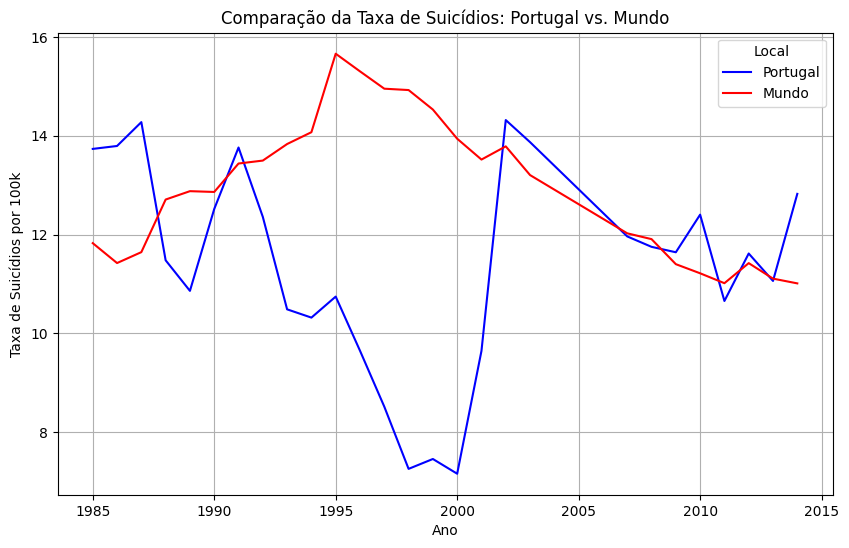

In [ ]:
# Obtendo a média anual de suicídios para Portugal e para o mundo
years = df_portugal['year'].unique()  # anos apenas para Portugal
suicides_portugal_mean = df_portugal.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# Removendo os anos 2015 e 2016 de suicides_world_mean e atualizar years para coincidir
suicides_world_mean = suicides_world_mean.loc[suicides_portugal_mean.index]  # filtrando anos

# Plotar o gráfico de linhas comparativo
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=suicides_portugal_mean.index, y=suicides_portugal_mean, label='Portugal', color='blue')
ax = sns.lineplot(x=suicides_world_mean.index, y=suicides_world_mean, label='Mundo', color='red')
plt.xlabel("Ano")
plt.ylabel("Taxa de Suicídios por 100k")
plt.title("Comparação da Taxa de Suicídios: Portugal vs. Mundo")
plt.legend(title="Local")
plt.grid(True)
plt.show()

Podemos verificarque a média de suicídios Portuguesa altera entre acima e abaixo da média mundial.

de 1985 a proximo de 1988, de 1991 a 1992, de 2002 a 2007 ficaram acima da média mundia e apartir de 2008 a 2013 ficou alternando entre acima e abaixo desta media.
A partir 2013 o *slope* vem em crescente e distanciando da média mundial.

No período de 1991 a 2002, a taxa de suicídio em Portugal se manteve bem abaixo da taxa mundial. Tendo o período de 1998 à 2000 como a menor taxa registrada no período e 2002 como o periodo mais alto da taxa de suicídios.

Notadamente, o slope da crescente taxa de suicídios de Portugal em apenas 2 anos, saindo de sua menor taxa para a sua maior em um período tão curto.


#Faixa etária com maior índice de suicídio

Será criada uma tabela Dinâmica (*pivot table*) para analisar as 6 faixas e´tarias em função do ano e do número de suicídios por 100 mil habitantes.

O principal objetivo é identificar a faixa etária que tem a maior representatividade entre aqueles que tiraram a própria vida, e identificar se houve alguma mudança no perfil ao longo dos 30 anos.

In [ ]:
#Criando a tabela dinâmica
table = pd.pivot_table(df_portugal, values='suicides_no', index=['year'], columns=['age'])

#Reordenando as tabelas para deixá-las em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

#Apresentando as 5 primeiras entradas da pivot table
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,5.0,61.0,59.0,131.0,171.5,64.0
1986,4.5,46.0,48.5,134.5,163.5,73.5
1987,2.5,52.0,61.5,129.5,152.0,82.5
1988,3.5,40.5,44.0,105.0,154.0,62.5
1989,2.0,38.0,47.0,77.0,142.0,67.5


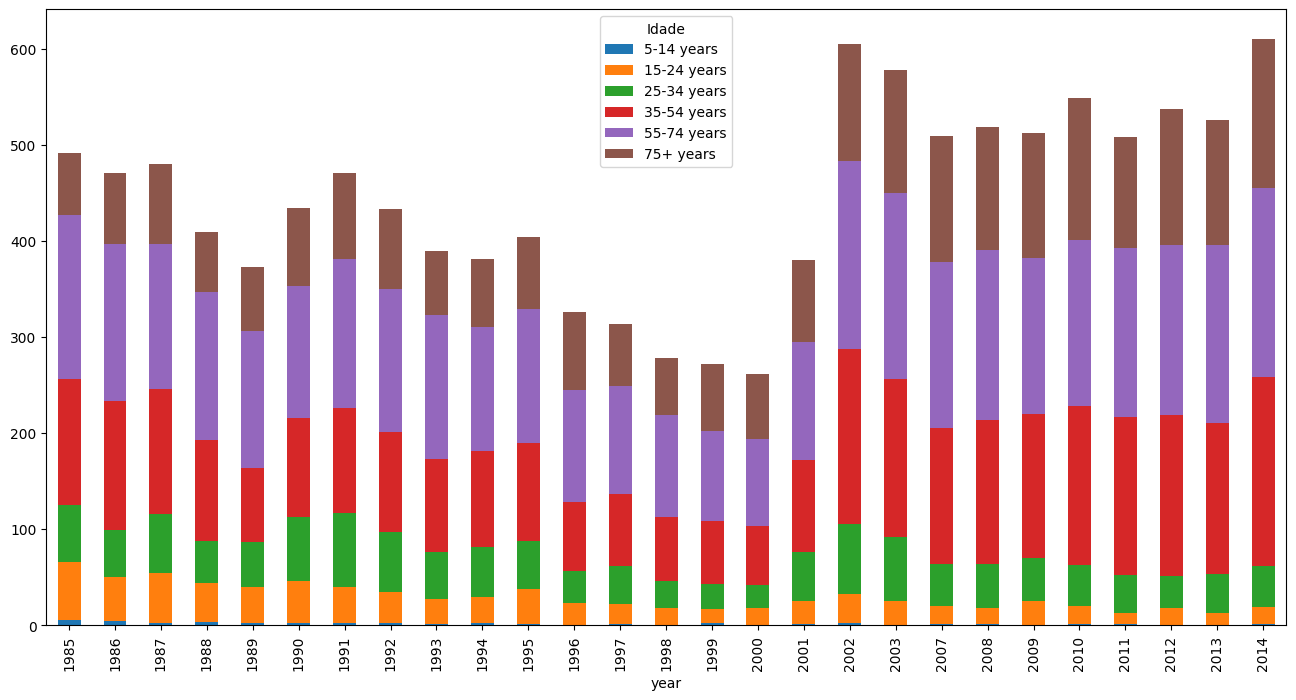

In [ ]:
# Plotar a pivot  table das faixas etárias
table.plot.bar(stacked =True, figsize=(16,8))
plt.legend(title="Idade");

Mesmo visivelmente, é facil notar que a faixa etária de 55-74 anos apresentou a maior taxa de suicídios. Podemos verificar que apartir do ano 2002 as faixas etárias de 35-54 e maior que 75 anos tiveram um aumento na taxa de suicídios.

In [ ]:
# Total de suicídios de Portugal
total_suicidios_portugal = df_portugal['suicides_no'].sum()


# Criando um dicionário para armazenar as porcentagens
percentuais = {}

#Calculando a porcentagem de cada faixa etária
for faixa_etaria in table.columns:
    suicidios_faixa = table[faixa_etaria].sum()
    percentual = (suicidios_faixa / total_suicidios_portugal) * 100
    percentuais[faixa_etaria] = percentual

# Criando um DataFrame para visualizar as porcentagens
percentuais_df = pd.DataFrame(list(percentuais.items()), columns=['Faixa Etária', 'Porcentagem'])
percentuais_df['porcentagem'] = percentuais_df['Porcentagem'].round(2)

# Exibindo o DataFrame
print(percentuais_df)


  Faixa Etária  Porcentagem  porcentagem
0   5-14 years     0.176634         0.18
1  15-24 years     3.127468         3.13
2  25-34 years     5.382154         5.38
3  35-54 years    13.580067        13.58
4  55-74 years    17.017165        17.02
5    75+ years    10.716512        10.72


Pode se analisar que as faixas etárias de 35 - 74 anos, correspondem a 33.77% da taxa de suicídios.

#Taxa de suicídios entre Homens e Mulheres

Outra análise de grande importância é ver a porcentagem dos suicídios entre Homens e Mulheres.

Analisando-se todo o período, o *dataset* utilizado mostrou que aprocimadamenre 75.6% dos casos foram cometidos por homens e 24.4% por mulheres.

Optou-se por pegar a média dos 30 anos, pois não houve mudança significativa desse comportamento durante o periodo.

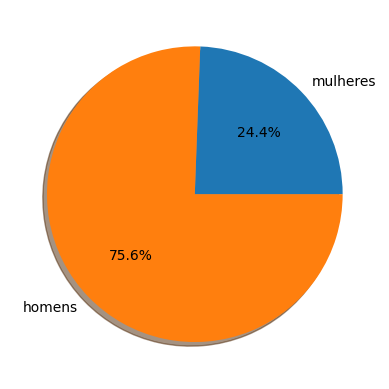

In [ ]:
# Extraindo valores entre homens e mulheres
homens_mulheres = df_portugal.groupby('sex').suicides_no.sum() / df_portugal.groupby('sex').suicides_no.sum().sum()

# Plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%2.1f%%', shadow=True);

### Correlações entre o PIB, IDH e número de suicídios

Criando uma matriz de correlação e plotando um *heatmap*, infere-se que o aumento no PIB per capita não diminuiu o número de suicídios por 100 mil habitantes. Na verdade, ele se manteve estável, contrariando o senso comum da maioria das pessoas.

Em relação ao IDH, como foi mencionado anteriormente, há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta ou com viés.

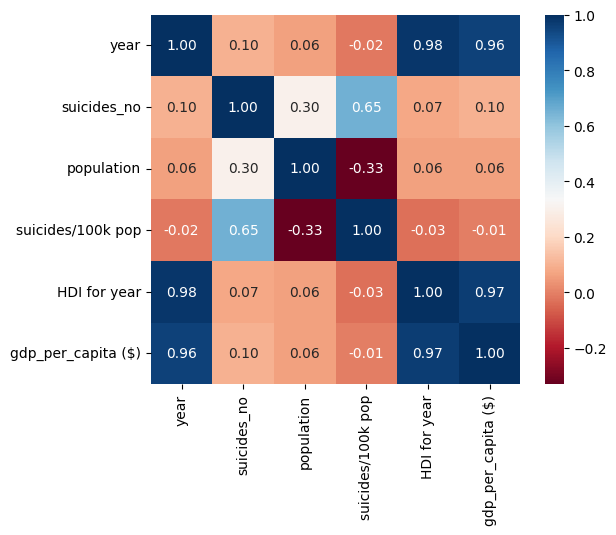

In [ ]:
#plotar heatmap
#Selecionar somente as colunas numéricas para o cálculo da correlação
numeric_df = df_portugal.select_dtypes(include=['number'])

# Calcula a correlação somente das colunas numéricas
corr = numeric_df.corr()
sns.heatmap(corr, cmap = 'RdBu',fmt ='.2f', square = True, linecolor = 'white', annot=True);

## Data Science na prevenção do suicídio

A proposta deste estudo é conscientizar a comunidade sobre a real importância de um problema tão latente nos dias atuais, porém negligenciado ou ignorado por boa parte das pessoas.

O conjunto de dados usado aqui é simplificado, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do tema.

Há diversas iniciativas dentro do campo da Inteligência Artificial visando não apenas a conscientização, mas também prevenção de suicídios. [Uma das mais populares diz respeito à análise de postagens em redes sociais](https://qz.com/1367197/machines-know-when-someones-about-to-attempt-suicide-how-should-we-use-that-information), onde algoritmos de *Machine Learning* são capazes de identificar potenciais suicidas e alertar outras pessoas.

> **A campanha é em setembro, mas falar sobre prevenção do suicídio em todos os meses do ano é fundamental** *-Setembro Amarelo*

Ainda são iniciativas muito incipientes, que esbarram em muitas questões de privacidade, porém empresas como a Meta já tem apostado nesse caminho.
